# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [50]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,F,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


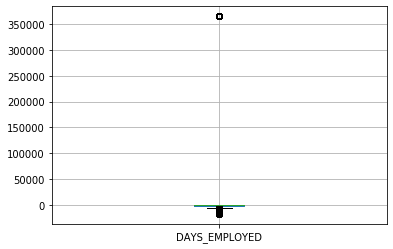

In [13]:
app_train.boxplot( column='DAYS_EMPLOYED')

In [12]:
app_train[app_train["DAYS_EMPLOYED"]==365243]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,0,F,0,1,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,0,F,0,1,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,0,F,0,1,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,0,F,0,1,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,0,F,0,1,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,0,F,0,1,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,0,F,0,1,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,0,M,0,1,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,0,F,0,1,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [14]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


In [17]:
app_train['DAYS_EMPLOYED'].isna().sum() #55374個異常值已換成nan

55374

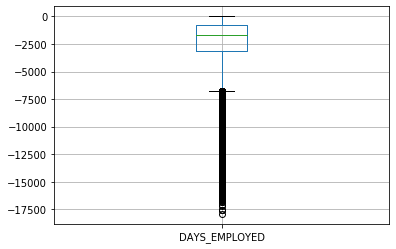

In [18]:
app_train.boxplot( column='DAYS_EMPLOYED')

In [19]:
app_train['DAYS_EMPLOYED']

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
           ...  
307506    -236.0
307507       NaN
307508   -7921.0
307509   -4786.0
307510   -1262.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [5]:
app_train['DAYS_BIRTH'] 

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [ ]:
# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [26]:
app_train['YEAR_BIRTH'] = app_train['DAYS_BIRTH']/365

In [36]:
app_train_year=app_train.loc[:,['YEAR_BIRTH','DAYS_BIRTH','AMT_INCOME_TOTAL','OWN_CAR_AGE']]

In [37]:
app_train_year=abs(app_train_year)

In [40]:
app_train_year['OWN_CAR_AGE'].isna().sum()

202929

In [43]:
app_train_year.corr()['AMT_INCOME_TOTAL'].sort_values()

OWN_CAR_AGE        -0.117273
YEAR_BIRTH         -0.027261
DAYS_BIRTH         -0.027261
AMT_INCOME_TOTAL    1.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [44]:
app_train_year["equal_freq_YEAR_BIRTH"] = pd.qcut(app_train_year["YEAR_BIRTH"], 4)

In [47]:
app_train_year["equal_freq_YEAR_BIRTH"].value_counts()

(43.151, 53.923]    76887
(20.517, 34.008]    76884
(34.008, 43.151]    76877
(53.923, 69.121]    76863
Name: equal_freq_YEAR_BIRTH, dtype: int64

In [52]:
len(app_train['TARGET'])

307511

In [53]:
len(app_train_year["equal_freq_YEAR_BIRTH"])

307511

In [51]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
year_group_sorted=np.sort(app_train_year["equal_freq_YEAR_BIRTH"].unique())

px = year_group_sorted
py = 100*app_train['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

ValueError: Grouper and axis must be same length

<Figure size 576x576 with 0 Axes>

=======================================================

In [35]:
app_train.corr()['AMT_INCOME_TOTAL'].sort_values()

OWN_CAR_AGE                   -0.117273
REGION_RATING_CLIENT_W_CITY   -0.091735
REGION_RATING_CLIENT          -0.085465
DAYS_EMPLOYED_ANOM            -0.064038
FLAG_DOCUMENT_6               -0.045878
                                 ...   
FLOORSMIN_AVG                  0.139860
AMT_CREDIT                     0.156870
AMT_GOODS_PRICE                0.159610
AMT_ANNUITY                    0.191657
AMT_INCOME_TOTAL               1.000000
Name: AMT_INCOME_TOTAL, Length: 111, dtype: float64

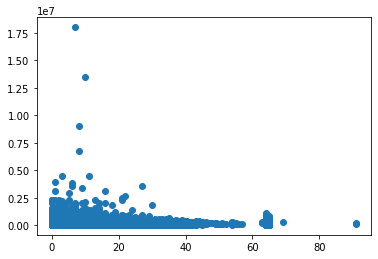

In [41]:
plt.scatter(app_train_year['OWN_CAR_AGE'], app_train_year['AMT_INCOME_TOTAL'])